In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2-x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x])

In [17]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2-x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

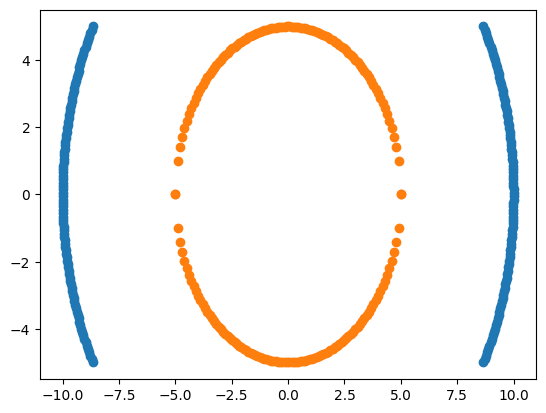

In [18]:
plt.scatter(y,x)
plt.scatter(x1,y1)

In [24]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y,x]).T,columns = ['x1','x2'])#T is for transpose and vstack used to stack the sequence of input array vertically to make a single array
df1['y'] = 0 #output feature for df1
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns = ['x1','x2'])
df2['y'] = 1 #output feature for df2
df = pd.concat([df1,df2] , ignore_index = True)
df.head(5)
print(df.head(5))

         x1       x2  y
0  8.660254 -5.00000  0
1  8.717792 -4.89899  0
2  8.773790 -4.79798  0
3  8.828277 -4.69697  0
4  8.881281 -4.59596  0


In [25]:
#getting the independent and dependent features
x = df.iloc[: , :2]
y = df.y

In [27]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: y, Length: 400, dtype: int64


In [28]:
#Now splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [30]:
print(y_train)

250    1
63     0
312    1
159    0
283    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: y, Length: 300, dtype: int64


In [33]:
from sklearn.svm import SVC
classifier = SVC(kernel = "linear")
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [34]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.45

In [39]:
print(df.head())

         x1       x2  y
0  8.660254 -5.00000  0
1  8.717792 -4.89899  0
2  8.773790 -4.79798  0
3  8.828277 -4.69697  0
4  8.881281 -4.59596  0


In [41]:
#Now we find the components for the Polynomial Kernels
#x1,x2,x1_square,x2_square,x1*x2
df['x1_square'] = df['x1']**2
df['x2_square'] = df['x2']**2
df['x1*x2'] = (df['x1'] * df['x2'])
print(df.head())

         x1       x2  y  x1_square  x2_square      x1*x2
0  8.660254 -5.00000  0  75.000000  25.000000 -43.301270
1  8.717792 -4.89899  0  75.999898  24.000102 -42.708375
2  8.773790 -4.79798  0  76.979390  23.020610 -42.096467
3  8.828277 -4.69697  0  77.938476  22.061524 -41.466150
4  8.881281 -4.59596  0  78.877155  21.122845 -40.818009


In [42]:
#Independent and Dependent Features
x = df[['x1','x2','x1_square','x2_square','x1*x2']]
y = df['y']

In [44]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: y, Length: 400, dtype: int64

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [48]:
print(x_train)

           x1        x2  x1_square  x2_square      x1*x2
250  4.999745  0.050505  24.997449   0.002551   0.252512
63   9.906589  1.363636  98.140496   1.859504  13.508984
312 -3.263736  3.787879  10.651974  14.348026 -12.362637
159 -9.953852 -0.959596  99.079176   0.920824   9.551676
283  3.680983  3.383838  13.549638  11.450362  12.455852
..        ...       ...        ...        ...        ...
323 -4.223140  2.676768  17.834915   7.165085 -11.304366
192 -9.031653 -4.292929  81.570758  18.429242  38.772248
117 -9.445795  3.282828  89.223038  10.776962 -31.008922
47   9.996811 -0.252525  99.936231   0.063769  -2.524447
172 -9.738311 -2.272727  94.834711   5.165289  22.132526

[300 rows x 5 columns]


In [49]:
import plotly.express as px
fig = px.scatter_3d(df,x = 'x1',y = 'x2',z ='x1*x2')
fig.show()

In [50]:
fig = px.scatter_3d(df,x = 'x1_square',y = 'x2_square',z = 'x1*x2',color = 'y')
fig.show()

In [51]:
classifier = SVC(kernel = 'linear')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)

1.0